In [1]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
finviz_url = "https://finviz.com/quote.ashx?t="
tickers = ["TTM","INFY","WIT"]

In [3]:
news_tables={}
for ticker in tickers:
    url=finviz_url + ticker
    req = Request(url = url, headers={"user-agent":"my-app"})
    response = urlopen(req)
    html = BeautifulSoup(response,"html")
    news_table= html.find(id="news-table")
    news_tables[ticker] = news_table


In [4]:
parsed_data =[]
for ticker,news_table in news_tables.items():
    for row in news_table.findAll("tr"):
        title = row.a.text
        date_data = row.td.text.split(" ")
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker,date,time,title])

In [5]:
df = pd.DataFrame(parsed_data, columns = ["ticker","date","time","title"])
df.head()

,ticker,date,time,title
0,TTM,May-13-22,05:53PM,Range Rover Sport to go electric as Jaguar Lan...
1,TTM,May-13-22,12:25AM,Indian shares track broader Asian stocks highe...
2,TTM,May-13-22,12:25AM,Indian shares end lower on SBI slump
3,TTM,May-12-22,07:28AM,UPDATE 2-Tata Motors warns of price and chip r...
4,TTM,May-11-22,10:47AM,India's Tata Group readying plan for battery c...


In [6]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
vader = SentimentIntensityAnalyzer()

In [8]:
f= lambda title:vader.polarity_scores(title)["compound"]
df["compound"]= df["title"].apply(f)

In [9]:
df.head()

,ticker,date,time,title,compound
0,TTM,May-13-22,05:53PM,Range Rover Sport to go electric as Jaguar Lan...,-0.6249
1,TTM,May-13-22,12:25AM,Indian shares track broader Asian stocks highe...,0.2960
2,TTM,May-13-22,12:25AM,Indian shares end lower on SBI slump,0.0000
3,TTM,May-12-22,07:28AM,UPDATE 2-Tata Motors warns of price and chip r...,-0.0516
4,TTM,May-11-22,10:47AM,India's Tata Group readying plan for battery c...,0.0000


In [25]:
df["date"]=pd.to_datetime(df.date)

In [26]:
df["month"]=df["date"].dt.month

In [28]:
df["year"]=df["date"].dt.year

<function matplotlib.pyplot.show(close=None, block=None)>

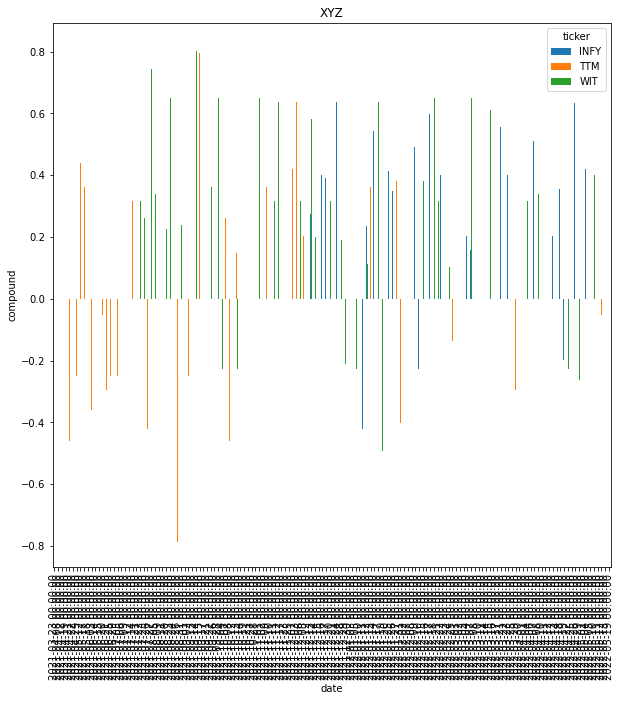

In [31]:
mean_df = df.groupby(["ticker","date"]).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound",axis="columns").transpose()
mean_df.plot(kind="bar",title="XYZ",ylabel="compound",xlabel="date",figsize=(10,10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

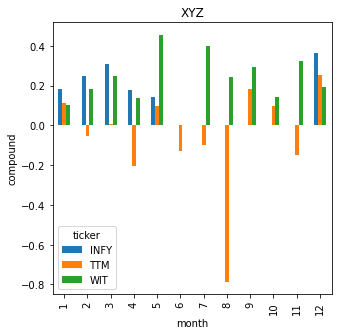

In [32]:
mean_df = df.groupby(["ticker","month"]).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound",axis="columns").transpose()
mean_df.plot(kind="bar",title="XYZ",ylabel="compound",xlabel="month",figsize=(5,5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

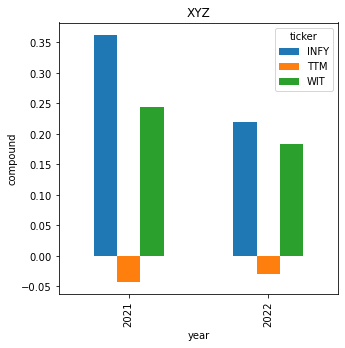

In [33]:
mean_df = df.groupby(["ticker","year"]).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs("compound",axis="columns").transpose()
mean_df.plot(kind="bar",title="XYZ",ylabel="compound",xlabel="year",figsize=(5,5))
plt.show

In [17]:
mean_df

ticker,INFY,TTM,WIT
date,,,
2021-03-23,NaN,0.000000,NaN
2021-04-08,NaN,0.128000,NaN
2021-04-12,NaN,0.000000,NaN
2021-04-19,NaN,0.000000,NaN
2021-04-21,NaN,-0.458800,NaN
...,...,...,...
2022-05-10,NaN,NaN,0.4019
2022-05-11,NaN,0.000000,0.6486
2022-05-12,NaN,-0.051600,NaN
